In [1]:
import pandas as pd
import numpy as np
import os
import pylab
import matplotlib.pyplot as plt
from scipy import stats, fftpack
import sklearn
import sklearn.metrics
from numpy import square, sqrt, array, arange, mean, var, linspace
from scipy import stats, fftpack
from sklearn import preprocessing

In [2]:
os.chdir('D:/UNIVERSITY_STUDY/PHM/2nd_term/NASA PHM/IMS/2nd_test/2nd_test/')
file_chdir=os.getcwd()
set1=[]
for root,dirs,files in os.walk(file_chdir):
    for file in files:
        File=pd.read_csv(file,sep='\s+',header=None,engine='python')
        set1.append(File)
print(set1)

[           0      1      2      3
0     -0.049 -0.071 -0.132 -0.010
1     -0.042 -0.073 -0.007 -0.105
2      0.015  0.000  0.007  0.000
3     -0.051  0.020 -0.002  0.100
4     -0.107  0.010  0.127  0.054
5     -0.078 -0.212  0.042 -0.044
6     -0.020 -0.010 -0.144 -0.007
7     -0.046  0.112  0.034  0.034
8     -0.063 -0.154  0.071  0.076
9      0.068  0.044 -0.029  0.054
10     0.095  0.022 -0.090 -0.037
11    -0.007  0.007 -0.024 -0.095
12    -0.046  0.000 -0.122 -0.059
13     0.044 -0.002 -0.068  0.027
14     0.137  0.007  0.054  0.073
15     0.098 -0.032  0.088 -0.029
16     0.081 -0.081 -0.090 -0.105
17    -0.073  0.042 -0.137 -0.083
18    -0.037  0.037  0.020 -0.015
19     0.012 -0.020  0.176 -0.005
20    -0.037  0.017 -0.044  0.032
21    -0.044 -0.051 -0.115 -0.024
22     0.015 -0.017  0.105 -0.061
23     0.044 -0.032  0.103 -0.081
24    -0.029 -0.022 -0.200 -0.044
25    -0.090  0.071  0.054  0.039
26    -0.061 -0.002  0.239  0.071
27    -0.042 -0.107  0.159  0.071
28    -0.002 

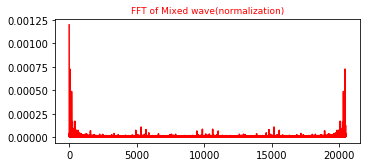

In [3]:
set2=[]
plt.figure(figsize=(12,5))  #利用快速傅立叶变换将2号轴承时域转化为频域
x2 = np.linspace(0, 1, 12000)
i=0
for i in range(984):
    y2 = set1[i][:][1]
    yy = fftpack.fft(y2)
    yf1=abs(fftpack.fft(y2))/len(x2)           #归一化处理
    xf1 = np.arange(len(y2))   # 频率
    set2.append(yf1)
plt.subplot(223)
plt.plot(xf1,yf1,'r')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
plt.show()


In [22]:
print(set2)

[array([0.02166608, 0.00078857, 0.0007582 , ..., 0.00048344, 0.0007582 ,
       0.00078857]), array([0.00437067, 0.00049393, 0.00068726, ..., 0.00071904, 0.00068726,
       0.00049393]), array([0.00289358, 0.00012695, 0.00044712, ..., 0.00065215, 0.00044712,
       0.00012695]), array([0.00408375, 0.00023249, 0.00033104, ..., 0.00015675, 0.00033104,
       0.00023249]), array([0.00266075, 0.00078982, 0.0003901 , ..., 0.00027439, 0.0003901 ,
       0.00078982]), array([2.47908333e-03, 8.11268257e-05, 3.16011145e-04, ...,
       9.72592364e-04, 3.16011145e-04, 8.11268257e-05]), array([0.00289442, 0.00052707, 0.00047362, ..., 0.00061229, 0.00047362,
       0.00052707]), array([0.00297583, 0.00019158, 0.00063131, ..., 0.00025101, 0.00063131,
       0.00019158]), array([1.36700000e-03, 6.75612050e-04, 4.27317491e-04, ...,
       3.92506589e-05, 4.27317491e-04, 6.75612050e-04]), array([0.00293017, 0.00032784, 0.00035274, ..., 0.0004053 , 0.00035274,
       0.00032784]), array([0.00330333, 0.

In [5]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [23]:
import math
Rs0=1
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
Rs1=[]
Rs2=[]
Rs3=[]
Rs4=[]
Rs5=[]
for j in range(984):
    f0_avg=np.mean(set2[0])
    f1_avg=np.mean(set2[j])
    for i in range(2560):
        qq1=set2[0][i]-f0_avg
        qq2=set2[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    Rs1.append(fengzi/math.sqrt(fengmu1*fengmu2))
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
for j in range(984):
    f0_avg=np.mean(set2[0])
    f1_avg=np.mean(set2[j])
    for i in range(2560,5120):
        qq1=set2[0][i]-f0_avg
        qq2=set2[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    Rs2.append(fengzi/math.sqrt(fengmu1*fengmu2))
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
for j in range(984):
    f0_avg=np.mean(set2[0])
    f1_avg=np.mean(set2[j])
    for i in range(5120,7680):
        qq1=set2[0][i]-f0_avg
        qq2=set2[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    Rs3.append(fengzi/math.sqrt(fengmu1*fengmu2))
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
for j in range(984):
    f0_avg=np.mean(set2[0])
    f1_avg=np.mean(set2[j])
    for i in range(7680,10240):
        qq1=set2[0][i]-f0_avg
        qq2=set2[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    Rs4.append(fengzi/math.sqrt(fengmu1*fengmu2))
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
for j in range(984):
    f0_avg=np.mean(set2[0])
    f1_avg=np.mean(set2[j])
    for i in range(10240):
        qq1=set2[0][i]-f0_avg
        qq2=set2[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    Rs5.append(fengzi/math.sqrt(fengmu1*fengmu2))
    
print(Rs1)
#print(Rs2)
#print(Rs3)
#print(Rs4)
#print(Rs5)

[1.0, 0.8918328464739019, 0.8357266744109801, 0.8101101349966159, 0.7816518962373075, 0.7451241774858729, 0.7533476911294377, 0.7556595185651588, 0.7231408152246207, 0.7065741098375119, 0.7113025160633794, 0.7033412292497538, 0.7097827248887113, 0.7027409175169829, 0.699869659076774, 0.7077698686367749, 0.7127496672755371, 0.6976252622613557, 0.6944432210905517, 0.6959022902646803, 0.699407027503624, 0.697764214823011, 0.6959104665258188, 0.6940374380147789, 0.6927734463943528, 0.6976852369076191, 0.7011557487722687, 0.7011563973935808, 0.7047985033751968, 0.7073371877907811, 0.7094271139410102, 0.7129611896283619, 0.7097662652701634, 0.7059825722903474, 0.7021017383448533, 0.701846298936393, 0.7052447409977988, 0.7079655199507395, 0.7108394990077024, 0.7001221056099696, 0.7028217647407458, 0.7050977400398356, 0.7048003948445629, 0.7074200550062236, 0.7100126478017509, 0.711328115087981, 0.7138961880435384, 0.7153641169389005, 0.7177802553546373, 0.7196407027750096, 0.7217964948538679,

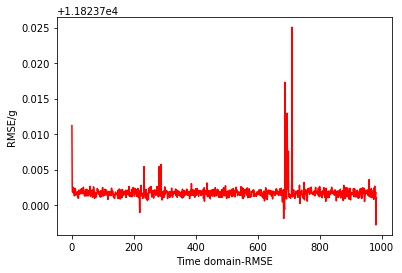

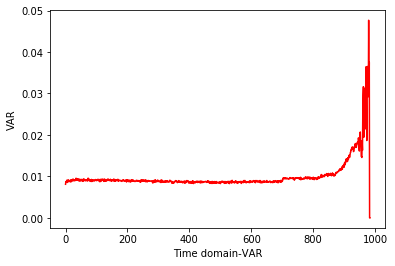

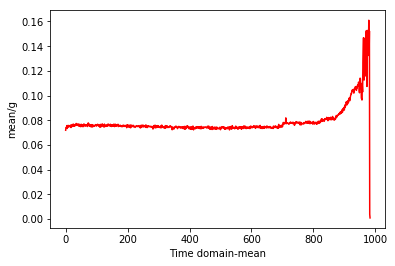

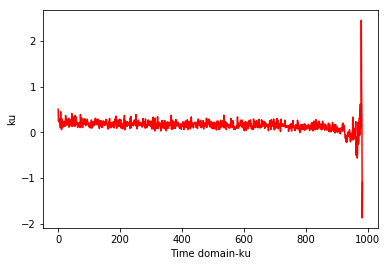

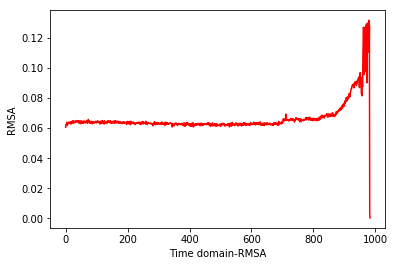

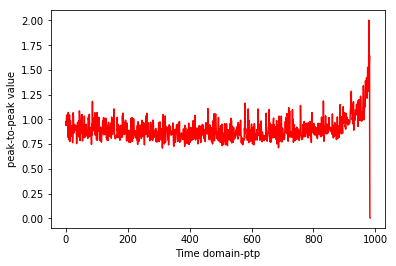

In [7]:
#提取2号轴承均方根误差RMSE---------------1
i = 0
rmse_1 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    rmse_1.append(sqrt(sklearn.metrics.mean_squared_error(x,y)))
plt.plot(xs,rmse_1,'r')
plt.xlabel(u"Time domain-RMSE") #X轴标签
plt.ylabel("RMSE/g") #Y轴标签
plt.show()

#提取2号轴承方差VAR-------------2
i = 0
var1 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    var1.append(var(y))
plt.plot(xs,var1,'r')
plt.xlabel(u"Time domain-VAR") #X轴标签
plt.ylabel("VAR") #Y轴标签
plt.show()

#提取2号轴承绝对均值-----------------------------3
i = 0
j = 0
mean1 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    y1 = array([y]).T
    for j in range(20480):
        y1[j]=abs(y1[j])
    mean1.append(mean(y1))
plt.plot(xs,mean1,'r')
plt.xlabel(u"Time domain-mean") #X轴标签
plt.ylabel("mean/g") #Y轴标签
plt.show()

#提取2号轴承峰度-------------------------4
i = 0
j = 0
ku_2 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    ku_2.append(stats.kurtosis(y))
plt.plot(xs,ku_2,'r')
plt.xlabel(u"Time domain-ku") #X轴标签
plt.ylabel("ku") #Y轴标签
plt.show()

#提取2号轴承方根幅值-----------5
i = 0
j = 0
RMSA_2 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    y1 = array(y).T
    for j in range(20480):
        y1[j]=abs(y1[j])
    RMSA_2.append(square(sum(sqrt(y1) / 20480)))
#RMSA_2 = RMSA_2.tolist()
plt.plot(xs,RMSA_2,'r')
plt.xlabel(u"Time domain-RMSA") #X轴标签
plt.ylabel("RMSA") #Y轴标签
plt.show()

#提取2号轴承峰峰值----------------6
i = 0
j = 0
ptp_2 = []
x = range(20480)
xs = range(984)
for i in range(984):
    y = set1[i][:][1]
    ptp_2.append(max(y) - min(y))
plt.plot(xs,ptp_2,'r')
plt.xlabel(u"Time domain-ptp") #X轴标签
plt.ylabel("peak-to-peak value") #Y轴标签
plt.show()

In [8]:
from sklearn import preprocessing
#装向量
set3 = [[0] * 6 for i in range(984)]
rmse_1=preprocessing.scale(rmse_1)
var1=preprocessing.scale(var1)
mean1=preprocessing.scale(mean1)
ku_2=preprocessing.scale(ku_2)
RMSA_2=preprocessing.scale(RMSA_2)
ptp_2=preprocessing.scale(ptp_2)
for i in range(984):
    set3[i][0]=rmse_1[i]
    set3[i][1]=var1[i]
    set3[i][2]=mean1[i]
    set3[i][3]=ku_2[i]
    set3[i][4]=RMSA_2[i]
    set3[i][5]=ptp_2[i]
print(set3)


[[8.079380829622647, -0.5033711262978473, -0.5690858935792472, 2.429833152990278, -0.5816442558063692, 0.6540553337184671], [0.6784226293434421, -0.3376188323893585, -0.3842030520759466, 0.6866635967098662, -0.39480485684551775, 0.33303795932079183], [0.0918547594480705, -0.3214372030525609, -0.3659258659007277, 1.0835023378125228, -0.3761938630819034, 0.7939859840969414], [0.6798260678465181, -0.36124914449805484, -0.39823339490117093, 0.5652739501437064, -0.4021128911394248, 1.1973155057760723], [0.04616083997570805, -0.23769723376995586, -0.24846580988654088, 0.5032367816215738, -0.248991630082044, 0.3330379593207909], [-0.03812894881272157, -0.38754462519182653, -0.44601867720451926, 0.22388102860616813, -0.4642562649329629, 0.514124683339993], [-0.09751235544695722, -0.31122569985220255, -0.334597101578604, 0.6667076342812777, -0.3453608178974893, 1.1726218615916366], [0.11152405607449273, -0.3456979748495777, -0.37041740042030075, -0.33857218656514315, -0.3714250121705112, -0.638

In [9]:
print(set3[0])

[8.079380829622647, -0.5033711262978473, -0.5690858935792472, 2.429833152990278, -0.5816442558063692, 0.6540553337184671]


In [10]:
#把向量转化为Rs向量
import math
Rs0=1
fengzi=0
qq1=0
qq2=0
fengmu1=0
fengmu2=0
fengmu=0
Rst1=[]
for j in range(984):
    f0_avg=np.mean(set3[0])
    f1_avg=np.mean(set3[j])
    for i in range(6):
        qq1=set3[0][i]-f0_avg
        qq2=set3[j][i]-f1_avg
        fengzi=np.abs(fengzi+qq1*qq2)
        fengmu1=fengmu1+qq1*qq1
        fengmu2=fengmu2+qq2*qq2
    fengmu=fengmu1*fengmu2
    #print(fengmu)
    #print(fengzi)
    Rst1.append(fengzi/math.sqrt(fengmu1*fengmu2))
print(Rst1)

[1.0, 0.7845228648292452, 0.6594052315303777, 0.6120799178117448, 0.5597929009248025, 0.522759220229582, 0.4822845201005761, 0.4692718654260975, 0.4215546090882627, 0.41381099888642636, 0.41889727984658176, 0.4200065394980298, 0.4112776833331356, 0.39643374542543597, 0.38473717551328845, 0.3744560704279348, 0.36292654090758647, 0.3613920133081204, 0.3605887076279015, 0.3415459670266762, 0.33889187541652005, 0.3208131471314465, 0.3260707800958068, 0.3200151221344819, 0.30624363611411604, 0.30251466908627284, 0.3001075788863962, 0.30505603260681013, 0.30157340439215824, 0.3002566425229327, 0.30579144179604156, 0.3094386782559305, 0.31465433414257293, 0.31500312622220394, 0.3104833290028433, 0.31142055439780975, 0.31113788456283287, 0.318855170125144, 0.3221079653266663, 0.32127978782850264, 0.3154087583680271, 0.30654506857642316, 0.3016438095303435, 0.3048424129592577, 0.2923262478171041, 0.2948007362335901, 0.28994094556270605, 0.29228311593226763, 0.29613007345511966, 0.29507196378689

In [11]:
#开始尝试进行小波包分解
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

mode = pywt.Modes.smooth
set4=[]

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)#选取小波函数
    a = data
    ca = []#近似分量
    for i in range(3):
        (a, d) = pywt.dwt(a, w, mode)#进行3阶离散小波变换
        ca.append(a)

    rec_a = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))#重构
    set4.append(rec_a[2])
for i in range(984):
    plot_signal_decomp(set1[i][1], 'sym5', "DWT: Ecg sample - Symmlets5")
print(set4)


[array([-0.05495657, -0.0516093 , -0.04744268, ...,  0.01556122,
        0.03159504,  0.04516378]), array([-0.08095637, -0.09436529, -0.09455236, ...,  0.0114142 ,
        0.0473663 ,  0.08601634]), array([ 0.00561758,  0.00472701,  0.00181574, ..., -0.006421  ,
       -0.07361566, -0.14895347]), array([ 0.02184414,  0.02211223,  0.02040608, ..., -0.11808948,
       -0.17138112, -0.23217646]), array([ 0.06999806,  0.0148029 , -0.02173348, ...,  0.14241994,
        0.22576791,  0.32127312]), array([-0.13968844, -0.09939755, -0.06655561, ..., -0.05538372,
       -0.07866448, -0.10996173]), array([-0.0571255 , -0.08842555, -0.10256437, ..., -0.06040223,
       -0.01906229,  0.02928821]), array([-0.02837479, -0.05343977, -0.06987248, ..., -0.0232942 ,
       -0.07755106, -0.13059908]), array([-0.06505547, -0.08140056, -0.0946369 , ...,  0.09150789,
        0.12755575,  0.16926189]), array([ 0.06666824,  0.07410178,  0.07153584, ..., -0.05315315,
       -0.06487333, -0.07638978]), array([-0

In [12]:
print(len(set4[0]))

20480


In [13]:
#计算能量比
#分为8段：0-2560；2560-5120；5120-7680；7680-10240
#10240-12800;12800-15360;15360-17920;17920-20480
Et=[]
for i in range(984):
    E1=0
    for j in range(2560):
        E1=E1+np.abs(set4[i][j])*np.abs(set4[i][j])

    E2=0
    for j in range(2560,5120):
        E2=E2+np.abs(set4[i][j])*np.abs(set4[i][j])



    E3=0
    for j in range(5120,7680):
        E3=E3+np.abs(set4[i][j])*np.abs(set4[i][j])



    E4=0
    for j in range(7680,10240):
        E4=E4+np.abs(set4[i][j])*np.abs(set4[i][j])




    E5=0
    for j in range(10240,12800):
        E5=E5+np.abs(set4[i][j])*np.abs(set4[i][j])



    E6=0
    for j in range(12800,15360):
        E6=E6+np.abs(set4[i][j])*np.abs(set4[i][j])



    E7=0
    for j in range(15360,17920):
        E7=E7+np.abs(set4[i][j])*np.abs(set4[i][j])



    E8=0
    for j in range(17920,20480):
        E8=E8+np.abs(set4[i][j])*np.abs(set4[i][j])
    Ez=E1+E2+E3+E4+E5+E6+E7+E8
    Et.append([E1/Ez,E2/Ez,E3/Ez,E4/Ez,E5/Ez,E6/Ez,E7/Ez,E8/Ez])

print(Et)

[[0.1280124385898305, 0.13527221553008834, 0.12377845802529196, 0.12694282514737035, 0.12999291825743914, 0.10629087199004099, 0.11665237150661073, 0.13305790095332815], [0.1220638531418973, 0.1224579361660713, 0.11672477648535752, 0.12971591942859675, 0.12956316120887607, 0.12509799995769297, 0.13279876759178377, 0.12157758601972421], [0.12665396047350216, 0.12891319738140608, 0.1289120981108419, 0.12638441805229142, 0.12393222746080759, 0.12401811618934573, 0.12503120398005743, 0.11615477835174765], [0.1289260235144299, 0.1263796822937168, 0.11868173270334399, 0.12442414347292093, 0.12129548575485856, 0.12003119674813828, 0.13328400597532622, 0.12697772953726533], [0.12250992878377388, 0.1260461009785518, 0.12470293907555863, 0.12685814682897348, 0.12239337015199336, 0.12718369020668296, 0.12582770409048136, 0.12447811988398427], [0.12274738095367886, 0.1363019645403797, 0.12347172302223132, 0.12491155725908526, 0.12789944435909903, 0.12493173342544892, 0.12225645277662778, 0.1174797

In [14]:
#构建特征集
feature= [[0] * 14 for i in range(984)]
for i in range(984):
    feature[i][0]=Rs1[i]
    feature[i][1]=Rs2[i]
    feature[i][2]=Rs3[i]
    feature[i][3]=Rs4[i]
    feature[i][4]=Rs5[i]
    feature[i][5]=Rst1[i]
    feature[i][6]=Et[i][0]
    feature[i][7]=Et[i][1]
    feature[i][8]=Et[i][2]
    feature[i][9]=Et[i][3]
    feature[i][10]=Et[i][4]
    feature[i][11]=Et[i][5]
    feature[i][12]=Et[i][6]
    feature[i][13]=Et[i][7]

In [15]:
feature

[[1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.1280124385898305,
  0.13527221553008834,
  0.12377845802529196,
  0.12694282514737035,
  0.12999291825743914,
  0.10629087199004099,
  0.11665237150661073,
  0.13305790095332815],
 [0.8918328464739019,
  0.6317328129832094,
  0.6344491923287172,
  0.7402633474256701,
  0.8059578993772062,
  0.7845228648292452,
  0.1220638531418973,
  0.1224579361660713,
  0.11672477648535752,
  0.12971591942859675,
  0.12956316120887607,
  0.12509799995769297,
  0.13279876759178377,
  0.12157758601972421],
 [0.8357266744109801,
  0.4974313777629839,
  0.5182591030240212,
  0.6550927890707362,
  0.727493229546926,
  0.6594052315303777,
  0.12665396047350216,
  0.12891319738140608,
  0.1289120981108419,
  0.12638441805229142,
  0.12393222746080759,
  0.12401811618934573,
  0.12503120398005743,
  0.11615477835174765],
 [0.8101101349966159,
  0.4359152619767626,
  0.4560207579216336,
  0.5980536295233743,
  0.6888669724913472,
  0.6120799178117448,
  0.12892602

In [16]:
#corr计算
Zcorr=[]
for j in range(14):
    fengmu=0
    fengzi=0
    qq1=0
    qq2=0
    corr=0
    ss1=[]
    #计算第一个特征的corr
    for i in range(984):
        ss1.append(feature[i][j])
    Fb=np.mean(ss1)
    Lb=983/2
    for i in range(984):
        fengzi=fengzi+np.abs((ss1[i]-Fb)*(i-Lb))
        qq1=qq1+(ss1[i]-Fb)*(ss1[i]-Fb)
        qq2=qq2+(i-Lb)*(i-Lb)
    fengmu=math.sqrt(qq1*qq2)
    corr=fengzi/fengmu
    Zcorr.append(corr)
print(Zcorr)

[0.7045064271193747, 0.3485489589133688, 0.3102430039863815, 0.4347813407098109, 0.5102658698942966, 0.6658707921174484, 0.682121842037341, 0.6771054874891809, 0.6713446694136586, 0.697615122031854, 0.6794055658659618, 0.6807416630320304, 0.6923467438456825, 0.6866649224318911]


In [17]:
#计算Mon

ZMon=[]
for j in range(14):
    ss2=[]
    Zeng=0
    Fu=0
    #计算第一个特征的Mon
    for i in range(984):
        ss2.append(feature[i][j])
    for i in range(983):
        if(ss2[i+1]-ss2[i]>0):
            Zeng=Zeng+1
        if(ss2[i+1]-ss2[i]<0):
            Fu=Fu+1
    Mon=np.abs((Zeng-Fu)/983)
    ZMon.append(Mon)
print(ZMon)

[0.023397761953204477, 0.30010172939979657, 0.1271617497456765, 0.24923702950152593, 0.013224821973550356, 0.13326551373346898, 0.019328585961342827, 0.0335707019328586, 0.013224821973550356, 0.021363173957273652, 0.019328585961342827, 0.017293997965412006, 0.009155645981688708, 0.015259409969481181]


In [18]:
#计算敏感特性的标准Cri=（Corr+Mon）/2
ZCri=[]
for i in range(14):
    ZCri.append((Zcorr[i]+ZMon[i])/2)
print(ZCri)

[0.3639520945362896, 0.32432534415658265, 0.218702376866029, 0.3420091851056684, 0.26174534593392346, 0.39956815292545866, 0.3507252139993419, 0.35533809471101974, 0.34228474569360445, 0.35948914799456383, 0.3493670759136523, 0.3490178304987212, 0.3507511949136856, 0.35096216620068615]
